In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

***Warning: Detected response matrix energy bin value = 0 (or neg).
     XSPEC will instead use small finite value (response file will not be altered).

1 spectrum  in use
 
Spectral Data File: 0916791301_M210grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  3.237e-03 +/- 1.356e-03 (21.0 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-10
  Telescope: XMM Instrument: EMOS2  Channel Type: PI
  Exposure Time: 1e+04 sec
 Using fit statistic: chi
 Using Background File                0916791301_M210spec_bkg.fits
  Background Exposure Time: 1e+04 sec
 Using Response (RMF) File            0916791301_M210spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0916791301_M210spec.arf



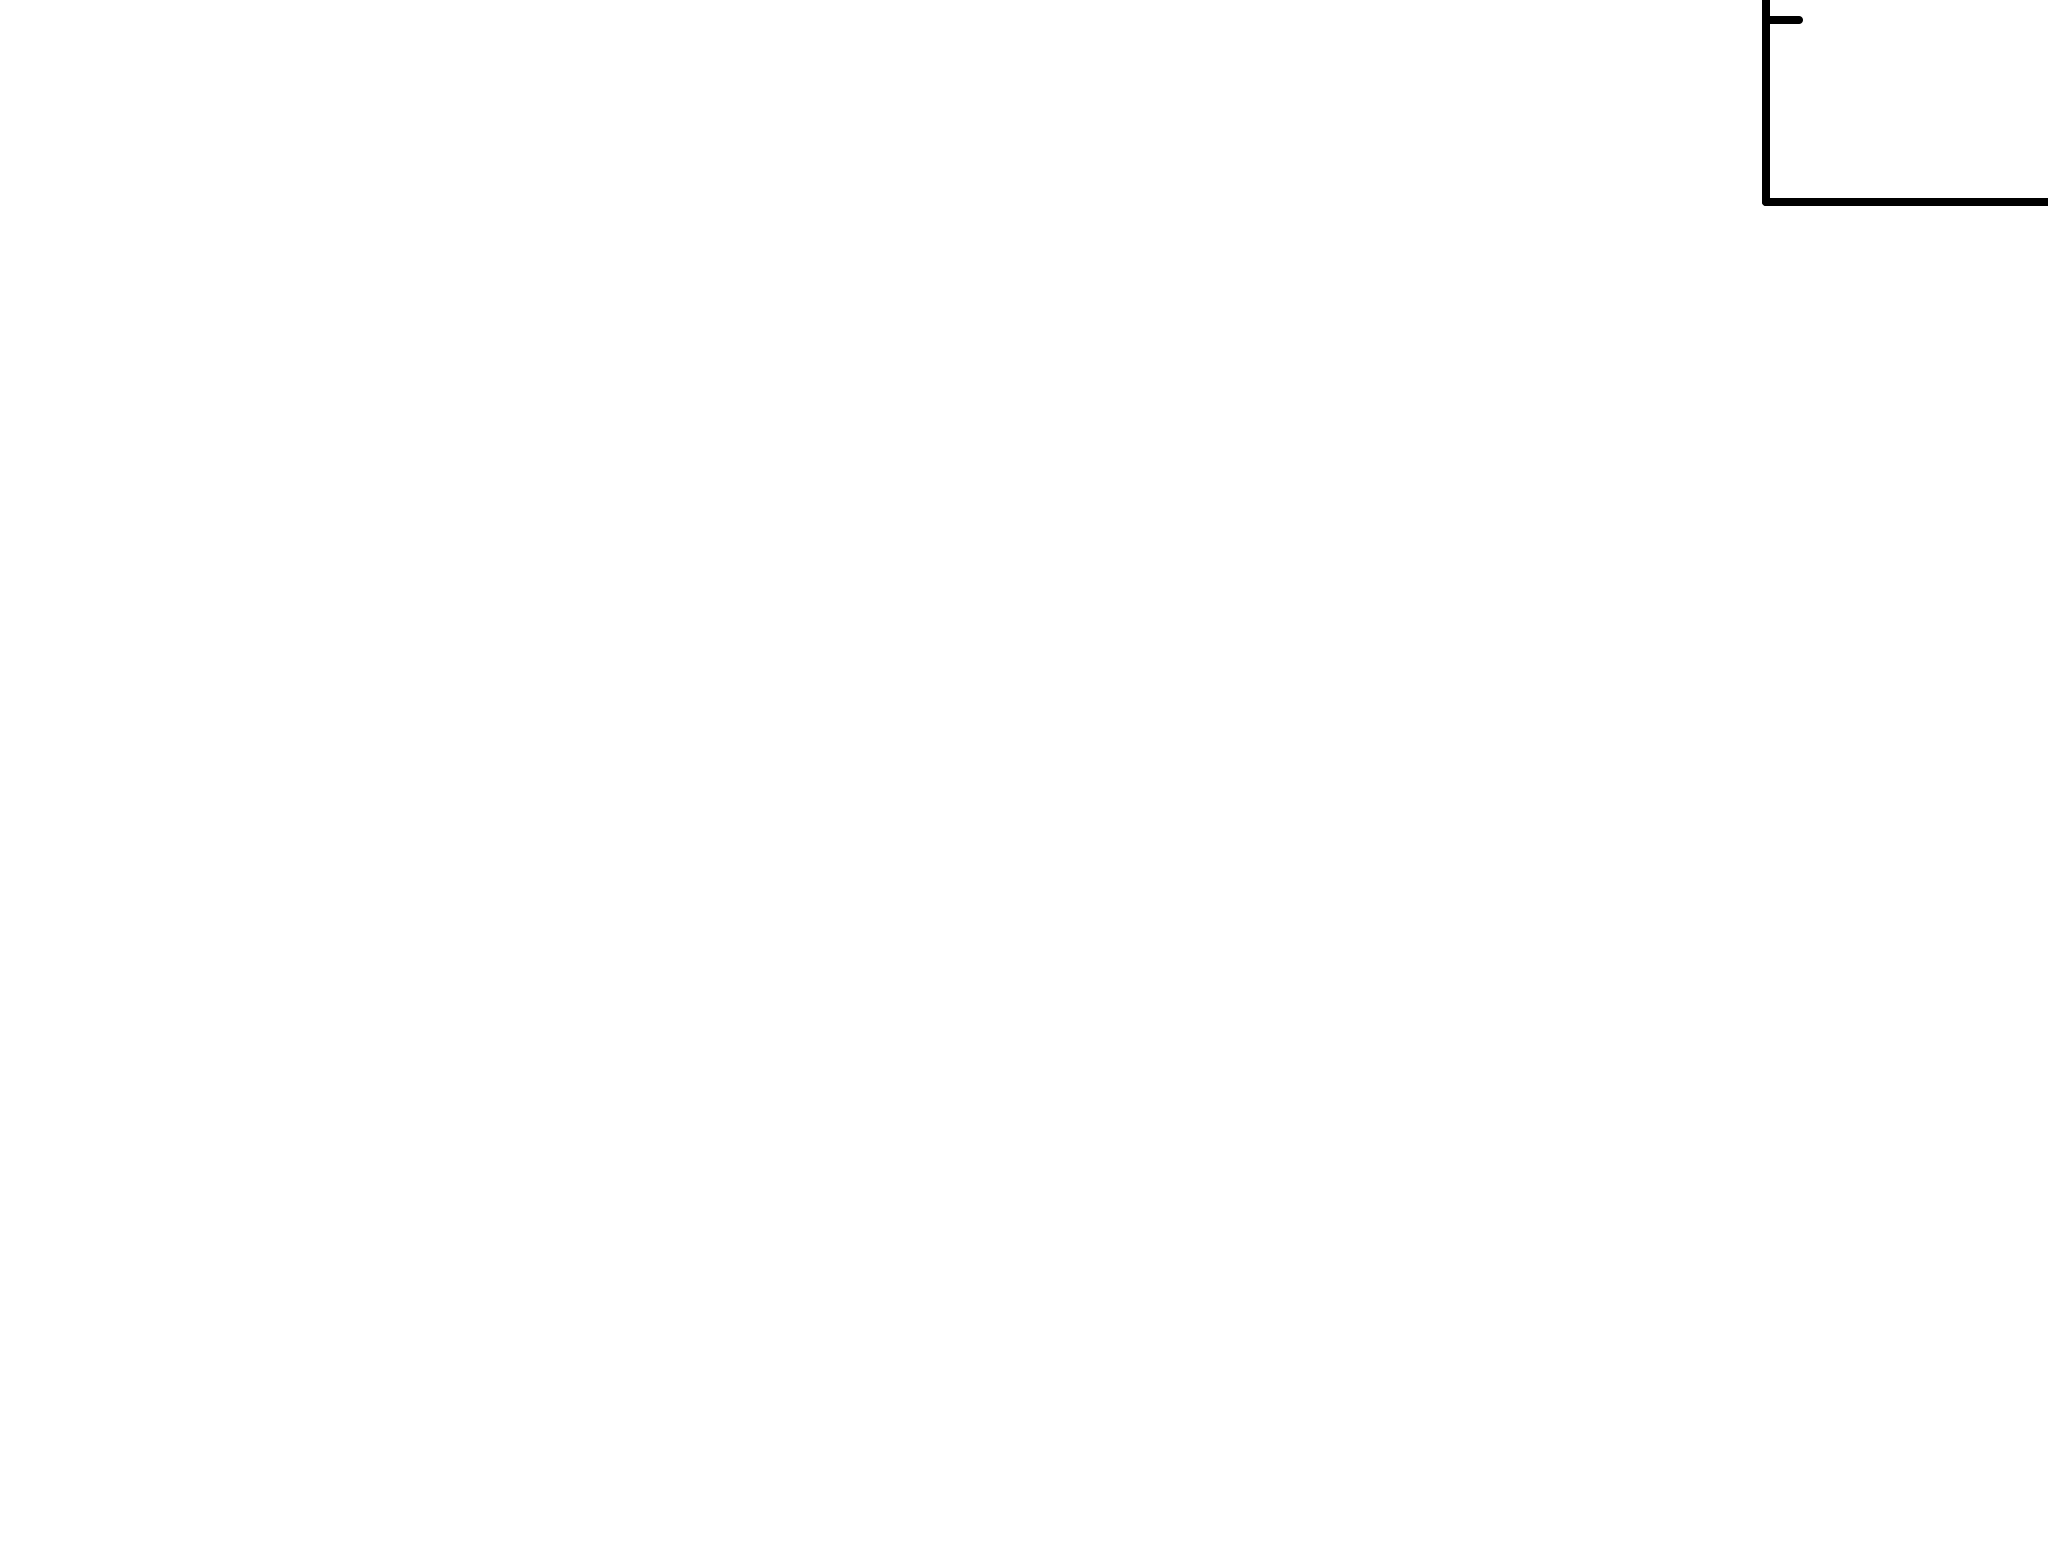

     1 channels (1) ignored in spectrum #     1
      No channels ignored (no channels in specified range)



In [2]:
spec_fnames = glob.glob('*grpspec*')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00005 0.005")
Plot("data")
spec.ignore("**-0.2 12.0-**")


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.

Fit statistic  : Chi-Squared

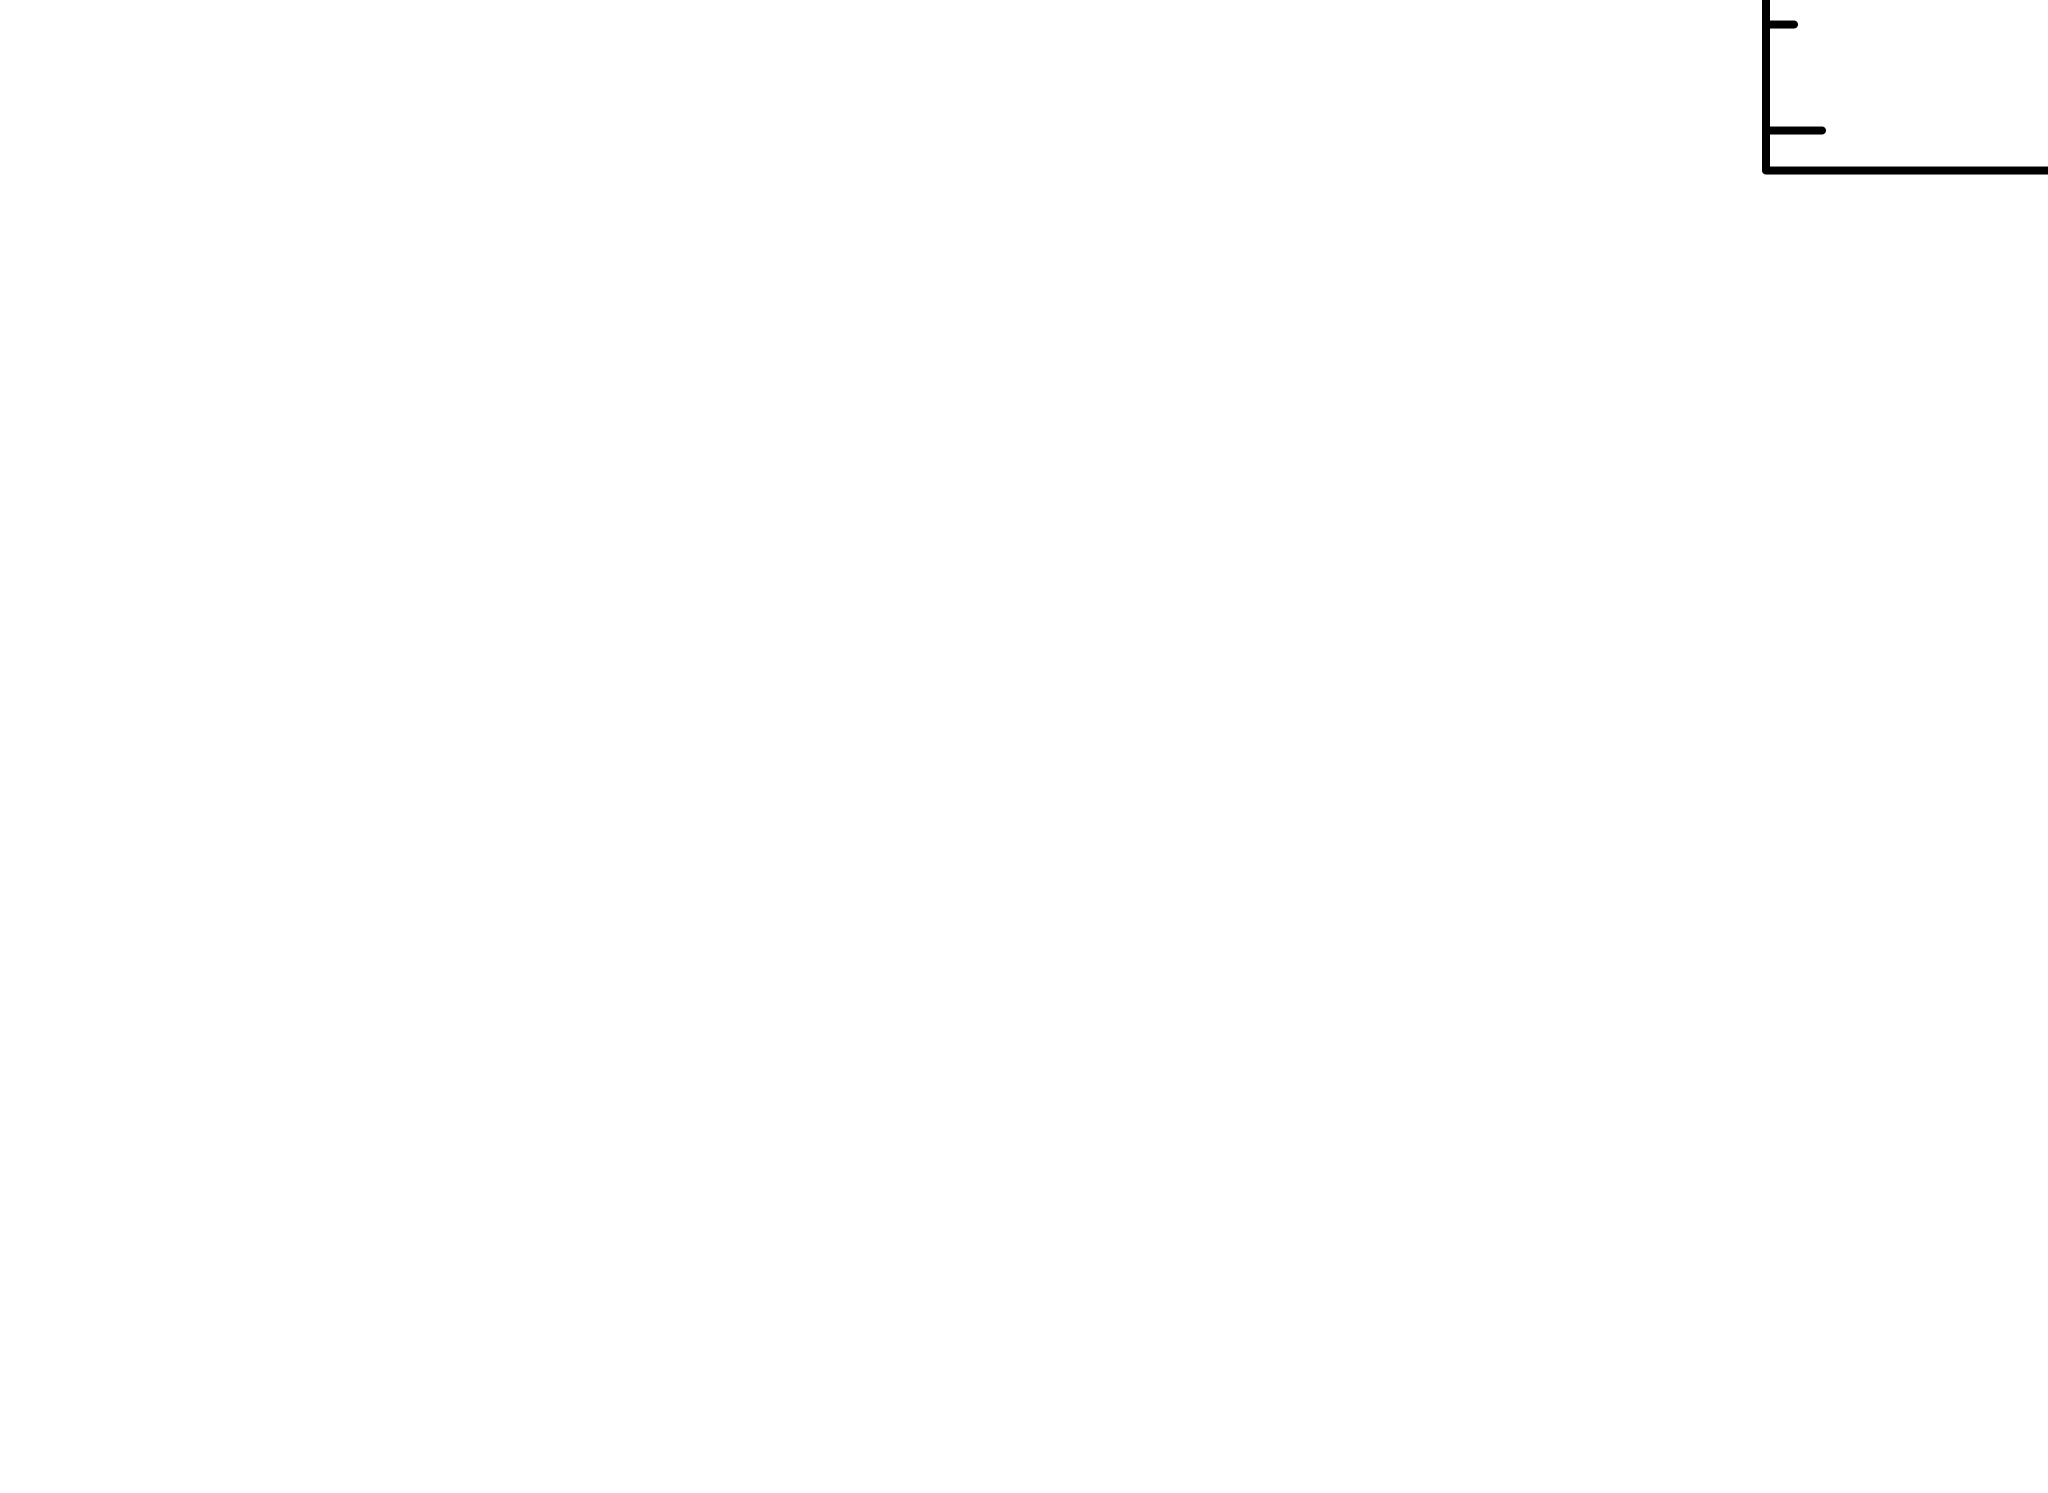

              6.163682e+10     using 9 bins.

Test statistic : Chi-Squared              6.163682e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
13.6244      0.0505736    -1       3.12774       4.44949   7.56712e-06
12.9217      13466.2      -1       13.9038       5.16040   2.00977e-05
10.7354      10174.6      -1       72.3765       2.82698   6.41311e-05
10.3111      4082.55      -1       60.6686       3.94427   0.000102541
10.138       1889.75      -1       63.8572       4.30716   0.000143392
10.0382      872.743      -1       66.5794       4.65501   0.000186183
9.96477      506.576      -1       69.0000       4.98269   0.000232675
9.90598      330.634      -1       71.2383       5.29270   0.000283637
9.85668      232.335      -1       73.3705       5.58740   0.000339660
9.81408      171.

In [3]:
AllModels.clear()
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")

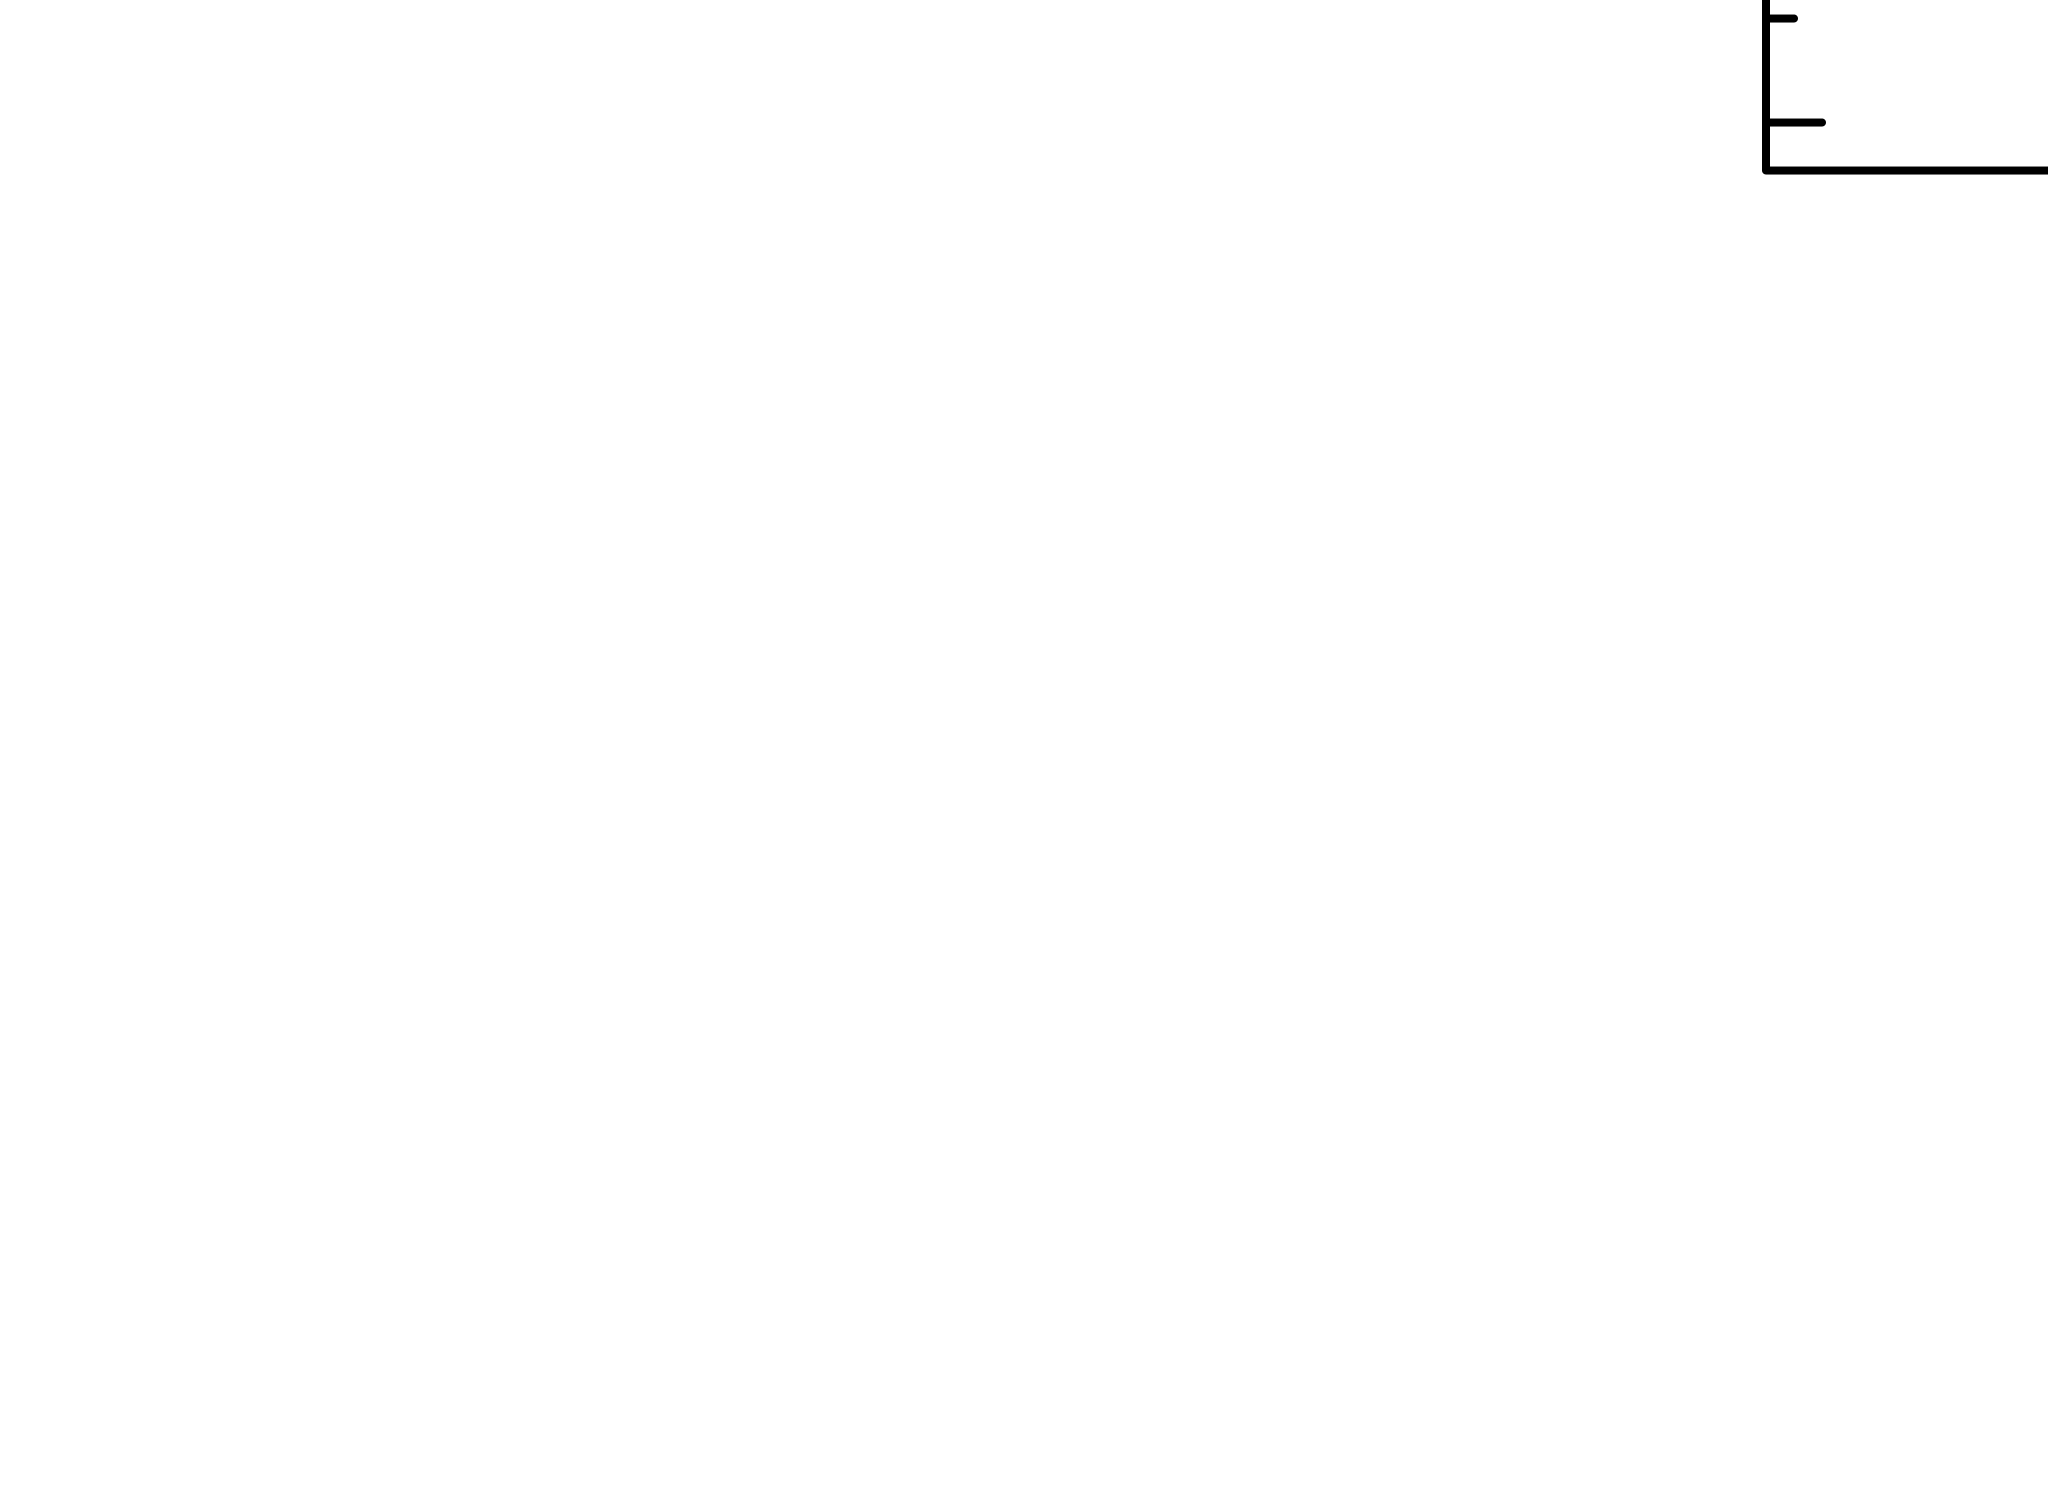


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              3.863820e+09     using 9 bins.

Test statistic : Chi-Squared              3.863820e+09     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
14.4813      0.0253632     0       1.94359       41.7825   4.39861e-06
14.2681      5376.3       -1       5.71113       197.063   2.65835e-05
14.2465      1016.02       0       5.37833       192.068   3.06781e-05
14.

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              9.484385e+08     using 9 bins.

Test statistic : Chi-Squared              9.484385e+08     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
 Due to zero model norms, the following fit parameters are tem

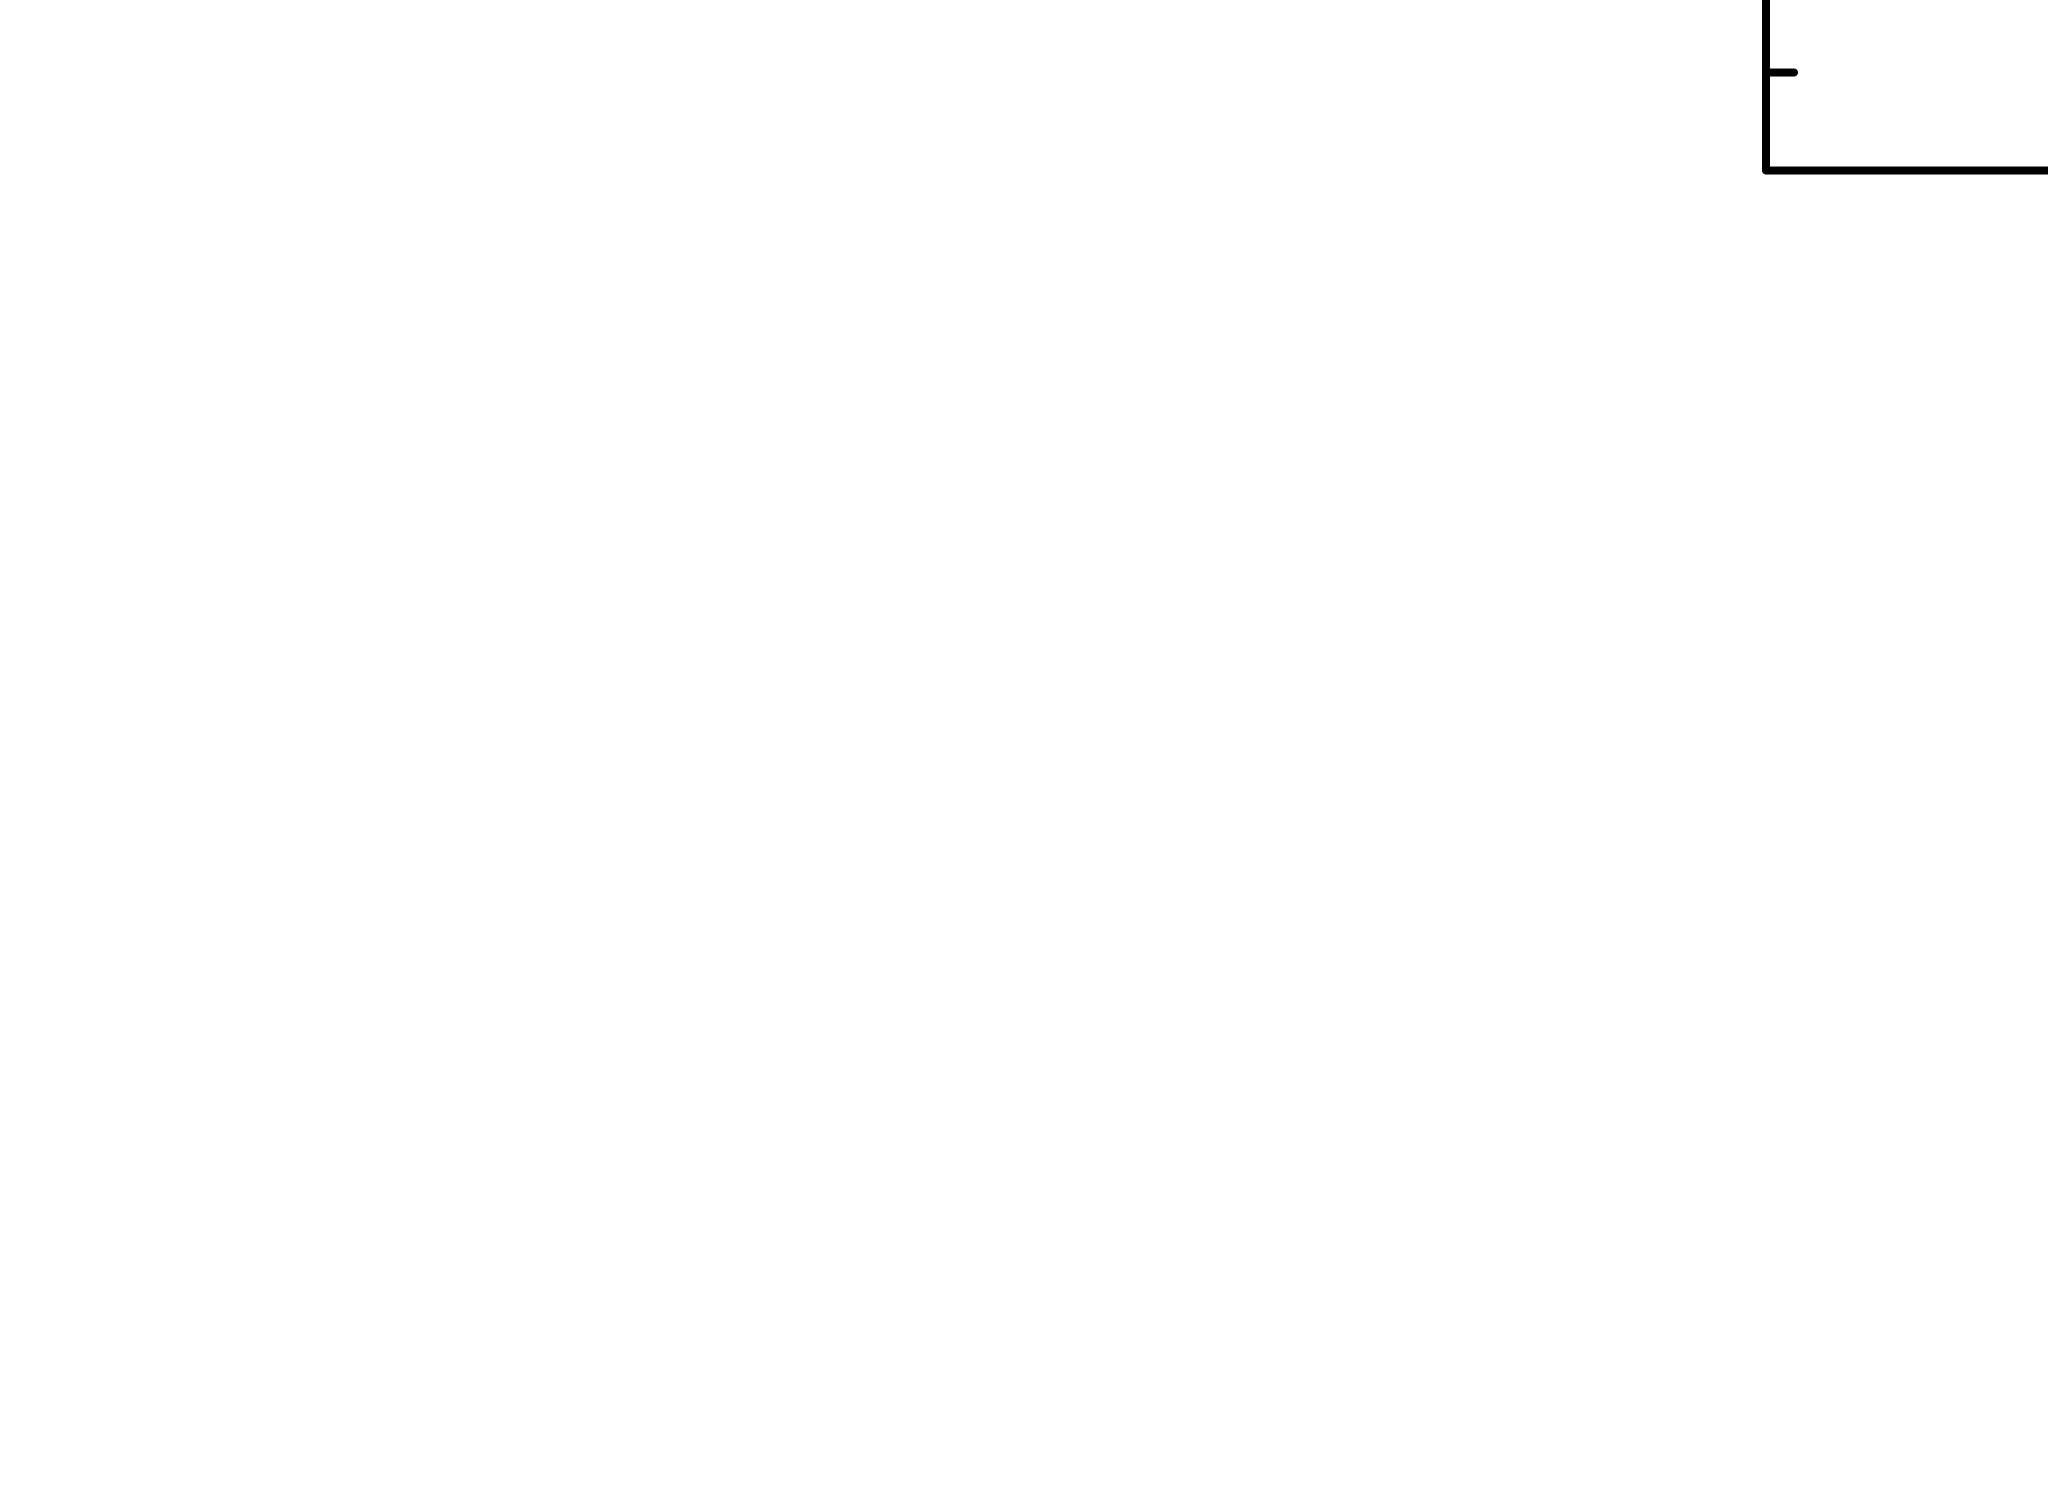

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

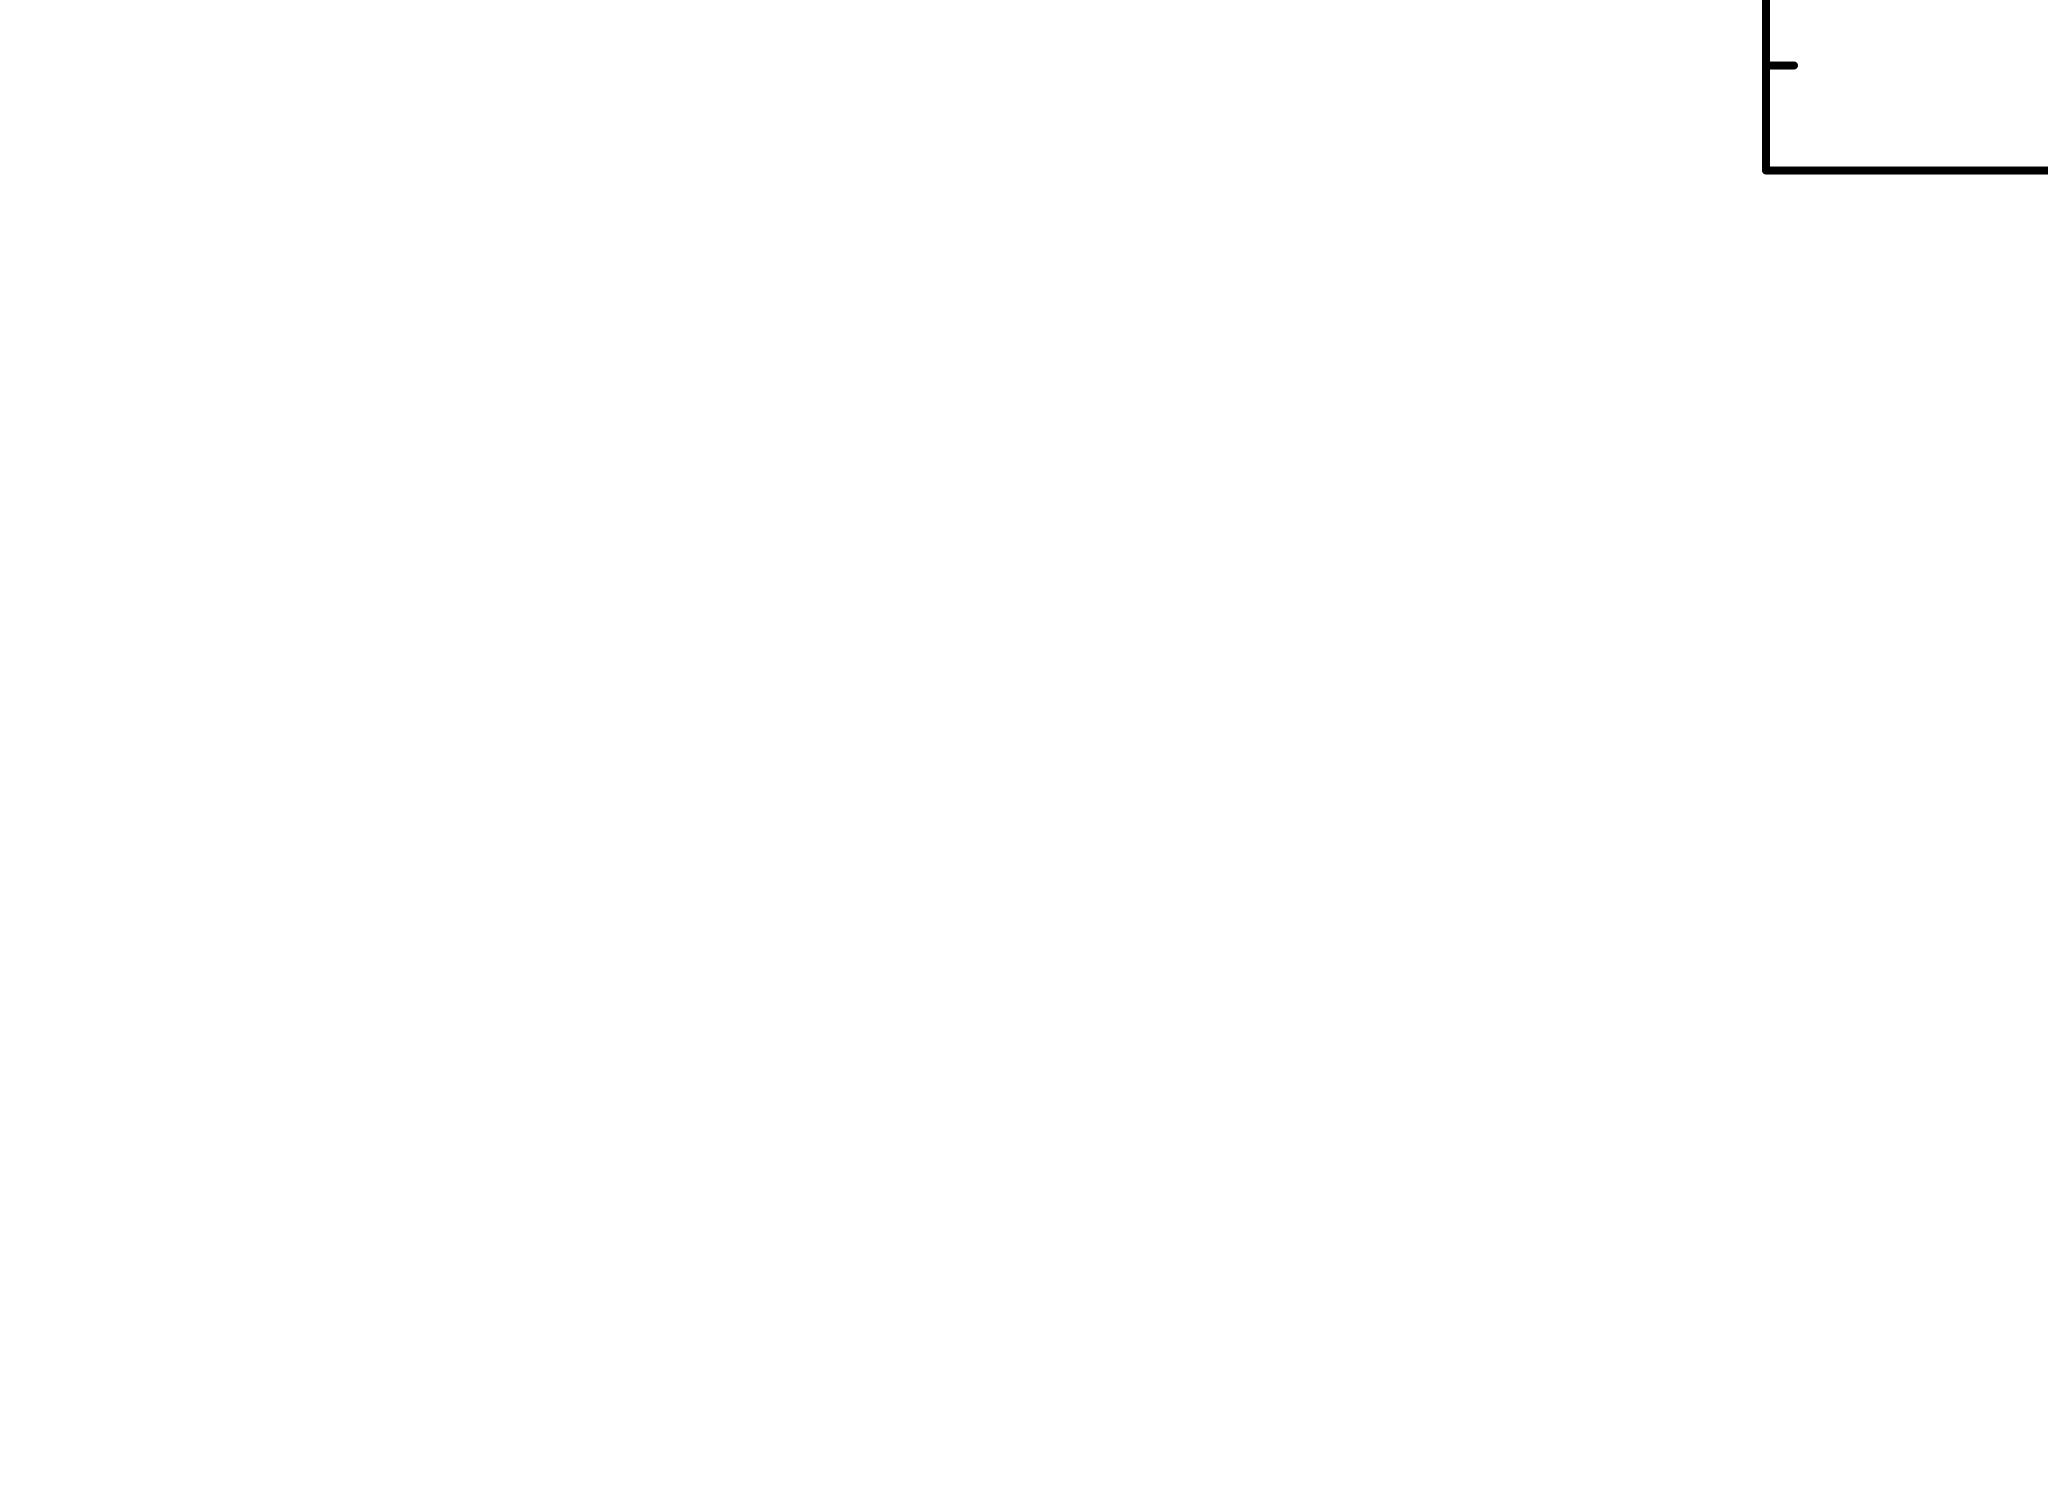


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.968885e+10     using 9 bins.

Test statistic : Chi-Squared              1.968885e+10     using 9 bins.
 Null hypothesis probability of 0.000000e+00 with 6 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
13.5888      0.0716676    -1       2.69659     -0.206288   1.41904e-06
12.618       60859        -1       7.96872      -1.42526   2.42460e-07
8.30343      1.07516e+06  -1       56.3728      -2.45087   4.45438e-07
8

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 0.0029508 photons (5.2814e-11 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
#plx = 0.45
d_kpc = 8
F_x = 4.0753*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

3.1197589646600196e+33


In [9]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.78)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', F_x/F_opt)

Optical Flux:  5.119049146085544e-14
F_x / F_opt:  7.961048787969379
